<a href="https://colab.research.google.com/github/sgbaird/honegumi/blob/main/1.0-sgb-gentle-introduction-jinja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Gentle Introduction to Jinja2

> Jinja is a fast, expressive, extensible templating engine. Special placeholders in the template allow writing code similar to Python syntax. Then the template is passed data to render the final document.

Templates are useful for a variety of applications. Often, they're used for web development, but this document will focus on generating dynamic Python scripts for tutorials and API documentation. We'll start with some basic examples, but please bear with me until the more interesting bits. First, let's install [Jinja2](https://jinja.palletsprojects.com/en/3.1.x/), which we'll refer to simply as "Jinja" throughout.

In [17]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    %pip install Jinja2

## HTML Hello World

Let's start with a simple example developing an HTML webpage that shows a `title`, greets the reader by `name`, and displays a `message` if `show_message` is true. We'll create the following document. If you're not familiar with HTML syntax, that's fine. We'll explain each of the elements.

```html
<!DOCTYPE html>
<html>
<head>
    <title>TITLE</title>
</head>
<body>
    <h1>Hello, NAME!</h1>
        <p>MESSAGE</p>
</body>
</html>
```

HTML tags are used to define the structure and content in an HTML document. An HTML tag consists of an opening tag `<...>`and a closing `tag </...>`. For example, `<p>` is the opening tag for a paragraph element, and `</p>` is the closing tag with the paragraph text in-between. The tags can be put all in one line or on separate lines.

Here are brief explanations of the tags used in this example:

| HTML Tag                 | Description
|--------------------------|------------
| `<!DOCTYPE html>`        | This line tells the browser about the version of HTML being used (in this case, HTML5).
| `<html>...</html>`       | This tag is a top-level container for all the content within an HTML document.
| `<head>...</head>`       | This tag contains meta-information that's not visible on the web page itself.
| `<title>TITLE</title>`   | This tag sets the title of the web page displayed in the browser's title bar or tab.
| `<h1>Hello, NAME!</h1>`  | This is a top-level (`1`) heading (`h`) with the heading text `Hello, NAME!`.
| `<p> ... </p>`           | This is a paragraph tag.

If you'd like to try, you can copy this into a text file, save it as `example.html` and open it with your browser of choice in your system's file explorer (see below).

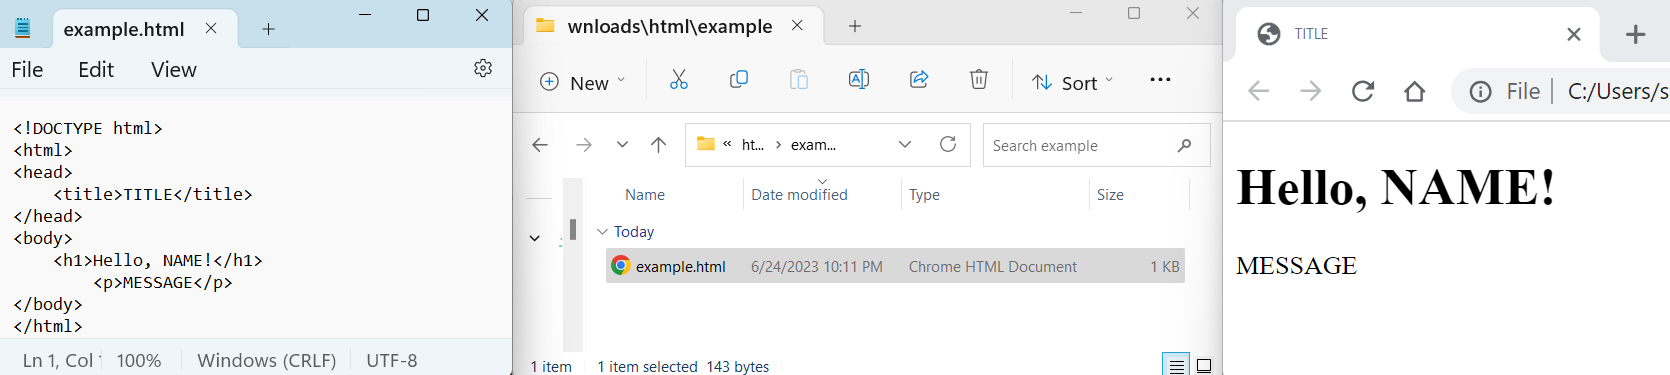

To help this stick, we'll compare a pure-Python solution with a Jinja solution.

### Python

First, we'll print the content from above without special formatting such as the title and heading. Instead of the generic `TITLE`, `NAME`, etc. placeholders, we'll use some non-dummy content.

In [18]:
# Define our data
title = "Jinja2 Tutorial"
name = "John"
message = "Welcome to the tutorial!"
show_message = True

In [19]:
print(title)
print(f"Hello, {name}!")
if show_message:
  print(message)

Jinja2 Tutorial
Hello, John!
Welcome to the tutorial!


This was without the special formatting, so let's write a pure-Python template that includes the HTML. We'll wrap it in a Python function (`html_template()`) as follows:

In [20]:
def html_template(title, name, message, show_message=True):
  message_line = f"<p>{message}</p>\n" if show_message else ""
  return f"""
  <!DOCTYPE html>
  <html>
  <head>
      <title>{title}</title>
  </head>
  <body>
      <h1>Hello, {name}!</h1>
          <p>{ message }</p>
  </body>
  </html>
  """

Note how we have to create the `message_line` separate from the multi-line string because it has an `if` statement. Let's call this function and fill in the template with the values defined earlier.

In [21]:
print(html_template(title, name, message, show_message=show_message))


  <!DOCTYPE html>
  <html>
  <head>
      <title>Jinja2 Tutorial</title>
  </head>
  <body>
      <h1>Hello, John!</h1>
          <p>Welcome to the tutorial!</p>
  </body>
  </html>
  


### Jinja

You got a sense of what it's like to use pure Python to generate a template. Next, we'll show a more flexible approach to creating and filling templates using Jinja. A Jinja template contains **variables** and/or **expressions**, which get replaced
with values when a template is *rendered*. **Tags**, control the
logic of the template, similar to f-strings in Python such as `f"My name is {name}."`. An example of a Jinja tag is `{{ title }}`.
<!-- The template syntax is heavily inspired by Django and
Python. -->
Let's use the Jinja template below.
```html
<!DOCTYPE html>
<html>
<head>
    <title>{{ title }}</title>
</head>
<body>
    <h1>Hello, {{ name }}!</h1>
    {% if show_message %}
        <p>{{ message }}</p>
    {% endif %}
</body>
</html>
```

The table below explains the Jinja-specific elements from this template:

| Jinja Tag       | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `{{ title }}`       | Variable Expression Tag: Renders the value of the `title` variable.             |
| `{{ name }}`        | Variable Expression Tag: Renders the value of the `name` variable.              |
| `{% if show_message %}` | Conditional Statement Tag: Executes the code block if the `show_message` variable is true. |
| `{% endif %}`          | Ends the conditional statement block.                                       |
| `{{ message }}`        | Variable Expression Tag: Renders the value of the `message` variable.           |

<!-- In the given template, the Jinja-specific elements are used for dynamic content rendering and control flow. The variable expressions (`{{ ... }}`) are used to substitute the values of the variables (`title`, `name`, and `message`) into the generated output. The conditional statement (`{% if ... %} ... {% endif %}`) controls whether the `<p>{{ message }}</p>` block is included in the output based on the value of the `show_message` variable. -->

Note how we didn't need to create separate code for the `if` statement. It appeared directly in the template:
```html
    {% if show_message %}
        <p>{{ message }}</p>
    {% endif %}
```

The vast array of functions that can be used inline with Python-like syntax is where Jinja really starts to shine.

First, let's do an example using in-line strings for simplicity. Afterwards, we'll use a separate template file. When developing complex solutions, the latter is typically easier to work with. A Jinja template is simply a text file. Jinja can generate any text-based format (HTML, XML, CSV, LaTeX, etc.).

#### Python string

As mentioned above, using Python strings here instead of separate files to represent the Jinja template is mostly for demonstration. First, we create a Jinja environment. A Jinja environment is an object that holds configuration settings and acts as a container for templates. It provides the necessary tools for loading templates, rendering them, and managing template-related operations.

In [22]:
from jinja2 import Environment
env = Environment()

Here, we define the template string per the example described above.

In [23]:
jinja_template_text = """
<!DOCTYPE html>
<html>
<head>
    <title>{{ title }}</title>
</head>
<body>
    <h1>Hello, {{ name }}!</h1>
    {% if show_message %}
        <p>{{ message }}</p>
    {% endif %}
</body>
</html>
"""

Finally, we load the template using the `from_string` method and populate it with our data using the `render` method.

In [24]:
template = env.from_string(jinja_template_text)
print(template.render(title=title, name=name, message=message, show_message=show_message))


<!DOCTYPE html>
<html>
<head>
    <title>Jinja2 Tutorial</title>
</head>
<body>
    <h1>Hello, John!</h1>
    
        <p>Welcome to the tutorial!</p>
    
</body>
</html>


Note that unlike the pure-Python function we defined above, we didn't have to define which variables we were going to pass in advance.

#### Template file

Next, we'll use a separate file for the Jinja template that's much more versatile. As before, we'll create a Jinja environment; however, we'll tell it where to look for our template files. Here, we'll use `.` which means the current directory. For those doing web app development, there is a separate [`PackageLoader`](https://jinja.palletsprojects.com/en/3.0.x/api/) that can be used, but we won't cover that here.

In [25]:
from jinja2 import Environment, FileSystemLoader
template_dir = "."
loader = FileSystemLoader(template_dir)
env = Environment(loader=loader)

A Jinja template doesn't need to have a
specific extension: `.html`, `.xml`, or any other extension is just fine. Here, we'll use `.jinja`, since it's commonly used and recognized by other programs. The file will be called `html_template.jinja` using special Google Colab syntax.

> NOTE: The file will show up in the file browser on the left panel

In [26]:
%%writefile html_template.jinja
<!DOCTYPE html>
<html>
<head>
    <title>{{ title }}</title>
</head>
<body>
    <h1>Hello, {{ name }}!</h1>
    {% if show_message %}
        <p>{{ message }}</p>
    {% endif %}
</body>
</html>


Overwriting html_template.jinja


Since it's a bit of a pain to write each of the keyword arguments every time we call `render`, this time we'll wrap the data into a dictionary and pass it directly. Note that we could also unwrap the kwargs via Python's `**` operator (i.e., `**data`). Jinja supports both ways.

In [27]:
# Define the data to be rendered
data = {
    "title": "Jinja2 Tutorial",
    "name": "John",
    "message": "Welcome to the tutorial!",
    "show_message": True,
}

Now that we're using a file, we'll use the `get_template` method with the `html_template.jinja` file and call `render` again.

In [28]:
html_template_name = "html_template.jinja"

# Load the template file
template = env.get_template(html_template_name)

# print the template rendered with the data
print(template.render(data))

<!DOCTYPE html>
<html>
<head>
    <title>Jinja2 Tutorial</title>
</head>
<body>
    <h1>Hello, John!</h1>
    
        <p>Welcome to the tutorial!</p>
    
</body>
</html>


## Python Scripts

Now that we've gone over an HTML example, let's move on to dynamically generating a Python script. This can be particularly useful for generating dynamic tutorials and API documentation examples. As before, we'll start with a basic example and then follow up with something more interesting.

### Random Number Generator

We'll fill in arbitrary min/max values into a script that generates a random integer between the min and max values that we set. Remember that this first example is contrived and that the overall goal is to create dynamic tutorials and API examples.

While we could name the file simply `randint.jinja`, we'll instead name it `randint.py.jinja` since certain software will recognize it as a Python/Jinja template and apply helpful syntax highlighting (e.g., [Better Jinja VS Code Extension](https://marketplace.visualstudio.com/items?itemName=samuelcolvin.jinjahtml)). Note that this doesn't apply in Google Colab.

In [29]:
%%writefile randint.py.jinja
# This is a generated Python script
import random

# Generate a random number between {{ min_value }} and {{ max_value }}
random_number = random.randint({{ min_value }}, {{ max_value }})
print("Random number:", random_number)

Overwriting randint.py.jinja


In [30]:
from jinja2 import Environment, FileSystemLoader

# Create an environment with the template directory
template_dir = "."
env = Environment(loader=FileSystemLoader(template_dir))

# Load the template file
template_name = "randint.py.jinja"
template = env.get_template(template_name)

# Define the data to be rendered
data = {
    'min_value': 1,
    'max_value': 10,
}

# print the rendered template
print(template.render(data))

# This is a generated Python script
import random

# Generate a random number between 1 and 10
random_number = random.randint(1, 10)
print("Random number:", random_number)


Note that we can execute this code directly in Python:

In [31]:
# This is a generated Python script
import random

# Generate a random number between 1 and 10
random_number = random.randint(1, 10)
print("Random number:", random_number)

Random number: 1


### Single vs. Multi-objective

For this next one, we'll use a boolean to toggle between single objective vs. multi-objective optimization. We'll use an example from Meta's Adaptive Experimentation (Ax) Platform. The Ax Platform is state-of-the-art, versatile, and has great developer support, so it's usually my go-to. However, the platform wasn't necessarily designed with chemists and materials scientists in mind (my domain). So, adapting some of the APIs and tutorials to materials-relevant optimization tasks can be non-trivial at times. Being able to generate "on-the-fly" tutorials for combinations of various algorithms can save a lot of time. Before we get into the Jinja-specific code, let's go over the Ax scripts for single objective and multi-objective optimization. To run this, we'll need to install the Ax Platform.


In [33]:
if IN_COLAB:
    %pip install ax-platform

#### Single-objective Optimization (SOO)

This script seeks to find the optimal combination of two variables (`x1` and `x2`) that minimize the "branin" function, which is just an analytic function that often gets used in optimization problems. To help it make it more concrete, the branin function is of the form:

$$f(x_1, x_2) = a(x_2 - bx_1^2 + cx_1 - r)^2 + s(1 - t)\cos(x_1) + s$$

An image of the response surface as a function of $x_1$ and $x_2$ is shown below. The
figure shows that there are three local minima to this function.

![Branin Function](./figures/branin-log.png)

The branin function can be easily imported and called within Ax. Note how the branin
function takes two floats as inputs and returns a float.

In [34]:
from ax.utils.measurement.synthetic_functions import branin

branin(1.0, 2.0)

21.62763539206238

However, the branin function is just the objective we chose to optimize. Think of it as whatever function or property that needs to be optimized for *your* application.

To run the optimization, you need to define parameter ranges and whether the objective should be minimized or maximized via `AxClient().create_experiment()`. In this case, we'll let `x1` vary in the range of `[-5.0, 10.0]` and `x2` in the range of `[0.0, 10.0]` and define each of these as continuous `"range"` parameters. In the second stage, we'll iteratively and repeatedly: suggest parameter values via `get_next_trial()`, evaluate the objective function via `branin(...)`, and record the results via `complete_trial()`. At the end, we identify the best parameter values corresponding to the lowest objective value via `get_best_parameters()`.

In [35]:
from ax.service.ax_client import AxClient
from ax.utils.measurement.synthetic_functions import branin

ax_client = AxClient()
ax_client.create_experiment(
    parameters=[
        {"name": "x1", "type": "range", "bounds": [-5.0, 10.0]},
        {"name": "x2", "type": "range", "bounds": [0.0, 10.0]},
    ],
    objective_name="branin",
    minimize=True,
)

for _ in range(15):
    parameters, trial_index = ax_client.get_next_trial()
    results = branin(parameters["x1"], parameters["x2"])
    ax_client.complete_trial(trial_index=trial_index, raw_data=results)

best_parameters, metrics = ax_client.get_best_parameters()

[INFO 06-27 03:55:52] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 06-27 03:55:52] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-27 03:55:52] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-27 03:55:52] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='x1', parameter_type=FLOAT, range=[-5.0, 10.0]), RangeParameter(name='x2', parameter_type=FLOAT, range=[0.0, 10.0])], parameter_constraints=[]).
[INFO 06-27 03:55:

### Multi-objective Optimization (MOO) 🐄

For real-world tasks, there are multiple (often competing) objectives each with its own trade-offs. This is especially true in materials optimization problems, where one of the simplest two-objective problems is to simultaneously optimize some property of interest and minimize the cost of the material.

For this script, we'll need a multi-objective optimization problem, so we define a contrived `branin_moo` that returns both the positive and negative values of the `branin` function (i.e., this ensures they are competing objectives). Note how the output is a dictionary mapping from the name of each objective (`branin` and `neg_branin`) to the function values rather than just to a float. This is important for the model to be able to keep track of which numbers correspond to which objectives. This is similar to how using a pandas DataFrame allows you to keep track of column names more robustly than if you were to only ever use a simple numpy array.

When we use `create_experiment`, rather than using the `objective_name` and `minimize` kwargs from `create_experiment`, we use the `objectives` kwarg together with the `ObjectiveProperties` class (one per objective). Similar to how the `branin_moo` function is defined, we'll pass a dictionary mapping from the objective name to the `ObjectiveProperties` class. Within the `ObjectiveProperties` class, we get to specify whether to minimize the objective or not.

Finally, since we no longer have a single best solution, but rather a "[Pareto front](https://en.wikipedia.org/wiki/Pareto_front)" of optimal trade-offs between objectives, we use the `get_pareto_optimal_parameters()` function instead of `get_best_parameters()` to evaluate the performance at the end.

In [36]:
from ax.service.ax_client import AxClient
from ax.utils.measurement.synthetic_functions import branin
from ax.service.utils.instantiation import ObjectiveProperties

obj1_name = "branin"
obj2_name = "neg_branin"


def branin_moo(x1, x2):
    """Multi-objective branin function

    The first objective is the normal branin value and second
    objective is the negative branin value.
    """
    return {obj1_name: branin(x1, x2), obj2_name: -branin(x1, x2)}


ax_client = AxClient()
ax_client.create_experiment(
    parameters=[
        {"name": "x1", "type": "range", "bounds": [-5.0, 10.0]},
        {"name": "x2", "type": "range", "bounds": [0.0, 10.0]},
    ],
    objectives={
        obj1_name: ObjectiveProperties(minimize=True, threshold=None),
        obj2_name: ObjectiveProperties(minimize=True, threshold=None),
    },
)

for _ in range(15):
    parameters, trial_index = ax_client.get_next_trial()
    results = branin_moo(parameters["x1"], parameters["x2"])
    ax_client.complete_trial(trial_index=trial_index, raw_data=results)

pareto_results = ax_client.get_pareto_optimal_parameters()


[INFO 06-27 03:56:01] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 06-27 03:56:01] ax.service.utils.instantiation: Due to non-specification, we will use the heuristic for selecting objective thresholds.
[INFO 06-27 03:56:01] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-27 03:56:01] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-27 03:56:01] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='x1', parameter_type=

### Jinja-switching between SOO vs. MOO

Now it's time to use Jinja with a boolean variable, `use_moo`, to toggle between single- vs. multi-objective optimization. While we use if statements here to toggle imports, something to note is that flake8 and other tools can remove unused imports. Instead of fiddling with imports we could do some simple post-processing.

In [37]:
%%writefile soo_vs_moo.py.jinja
from ax.service.ax_client import AxClient
from ax.utils.measurement.synthetic_functions import branin
{% if use_moo %}
from ax.service.utils.instantiation import ObjectiveProperties

obj1_name = "branin"
obj2_name = "neg_branin"

def branin_moo(x1, x2):
    """Multi-objective branin function

    The first objective is the normal branin value and the second
    objective is the negative branin value.
    """
    return {obj1_name: branin(x1, x2), obj2_name: -branin(x1, x2)}
{% endif %}

ax_client = AxClient()
ax_client.create_experiment(
    parameters=[
        {"name": "x1", "type": "range", "bounds": [-5.0, 10.0]},
        {"name": "x2", "type": "range", "bounds": [0.0, 10.0]},
    ],
{% if use_moo %}
    objectives={
        obj1_name: ObjectiveProperties(minimize=True, threshold=None),
        obj2_name: ObjectiveProperties(minimize=True, threshold=None),
    },
{% else %}
    objective_name="branin",
    minimize=True,
{% endif %}
)

for _ in range(15):
    parameters, trial_index = ax_client.get_next_trial()
    results = branin{% if use_moo %}_moo{% endif %}(
        parameters["x1"], parameters["x2"]
        )
    ax_client.complete_trial(trial_index=trial_index, raw_data=results)

{% if use_moo %}
pareto_results = ax_client.get_pareto_optimal_parameters()
{% else %}
best_parameters, metrics = ax_client.get_best_parameters()
{% endif %}

Writing soo_vs_moo.py.jinja


Similar to before, we load the template, render it with our data, and print the output. This time, we'll also save the populated templates to files and run them using the shebang (`!`) operator which passes the commands to the operating system's shell.

In [38]:
from jinja2 import Environment, FileSystemLoader

# Create an environment with the template directory
template_dir = "."
env = Environment(loader=FileSystemLoader(template_dir))

# Load the template file
template_name = "soo_vs_moo.py.jinja"
template = env.get_template(template_name)

# print and save the rendered template
soo_script = template.render(use_moo=False)
print(soo_script)
with open("soo.py", "w") as f:
  f.write(soo_script)

from ax.service.ax_client import AxClient
from ax.utils.measurement.synthetic_functions import branin


ax_client = AxClient()
ax_client.create_experiment(
    parameters=[
        {"name": "x1", "type": "range", "bounds": [-5.0, 10.0]},
        {"name": "x2", "type": "range", "bounds": [0.0, 10.0]},
    ],

    objective_name="branin",
    minimize=True,

)

for _ in range(15):
    parameters, trial_index = ax_client.get_next_trial()
    results = branin(
        parameters["x1"], parameters["x2"]
        )
    ax_client.complete_trial(trial_index=trial_index, raw_data=results)


best_parameters, metrics = ax_client.get_best_parameters()



In [39]:
!python soo.py

[INFO 06-27 03:56:20] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 06-27 03:56:20] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-27 03:56:20] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-27 03:56:20] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='x1', parameter_type=FLOAT, range=[-5.0, 10.0]), RangeParameter(name='x2', parameter_type=FLOAT, range=[0.0, 10.0])], parameter_constraints=[]).
[INFO 06-27 03:56:

In [40]:
# print and save the rendered template
moo_script = template.render(use_moo=True)
print(moo_script)
with open("moo.py", "w") as f:
  f.write(moo_script)

from ax.service.ax_client import AxClient
from ax.utils.measurement.synthetic_functions import branin

from ax.service.utils.instantiation import ObjectiveProperties

obj1_name = "branin"
obj2_name = "neg_branin"

def branin_moo(x1, x2):
    """Multi-objective branin function

    The first objective is the normal branin value and the second
    objective is the negative branin value.
    """
    return {obj1_name: branin(x1, x2), obj2_name: -branin(x1, x2)}


ax_client = AxClient()
ax_client.create_experiment(
    parameters=[
        {"name": "x1", "type": "range", "bounds": [-5.0, 10.0]},
        {"name": "x2", "type": "range", "bounds": [0.0, 10.0]},
    ],

    objectives={
        obj1_name: ObjectiveProperties(minimize=True, threshold=None),
        obj2_name: ObjectiveProperties(minimize=True, threshold=None),
    },

)

for _ in range(15):
    parameters, trial_index = ax_client.get_next_trial()
    results = branin_moo(
        parameters["x1"], parameters["x2"]
        )
   

In [41]:
!python moo.py

[INFO 06-27 03:56:39] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 06-27 03:56:39] ax.service.utils.instantiation: Due to non-specification, we will use the heuristic for selecting objective thresholds.
[INFO 06-27 03:56:39] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-27 03:56:39] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-27 03:56:39] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='x1', parameter_type=

## Next Steps

This gives you an idea of how Jinja templates can be used to dynamically generate Python scripts. Since Jinja allows you to use other template files inside of templates, use other constructs such as for loops, run arbitrary Python code within `{%...%}` containers, among other features, the script generation can be highly flexible while maintaining readability. To spur some additional thought, here are some other features that you could implement for dynamically generated tutorials:
- Togglable comments (none, minimal, detailed)
- Dynamic number of variables / objectives
- Ability to toggle between multiple examples to solidify learning/retention
- Markdown-like script formats that can be converted to Jupyter notebook tutorials
- Integrations with frameworks like [`PyScaffold`](https://pyscaffold.org/en/stable/) or [`cookiecutter-pypackage`](https://github.com/audreyfeldroy/cookiecutter-pypackage) to create bootstrap templates with data, unit testing, etc.
- Exposing the template generation as a web app with the flexibility of a script output
- Inclusion of performance comparisons for baseline methods

So, what's next? Get started reading [the Jinja docs](https://jinja.palletsprojects.com/en/3.0.x/templates/) and help contribute to [Honegumi](https://github.com/sgbaird/honegumi) (骨組み, pronounced "ho neh goo mee"), meaning a "skeletal framework". Honegumi is a package for creating dynamic API tutorials with a focus on optimization packages such as Meta's Ax Platform. It is under active development, so contributions and collaborations are welcome!